<a href="https://colab.research.google.com/github/love-bees/dataHacker/blob/master/LINREG_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #006 Linear regression

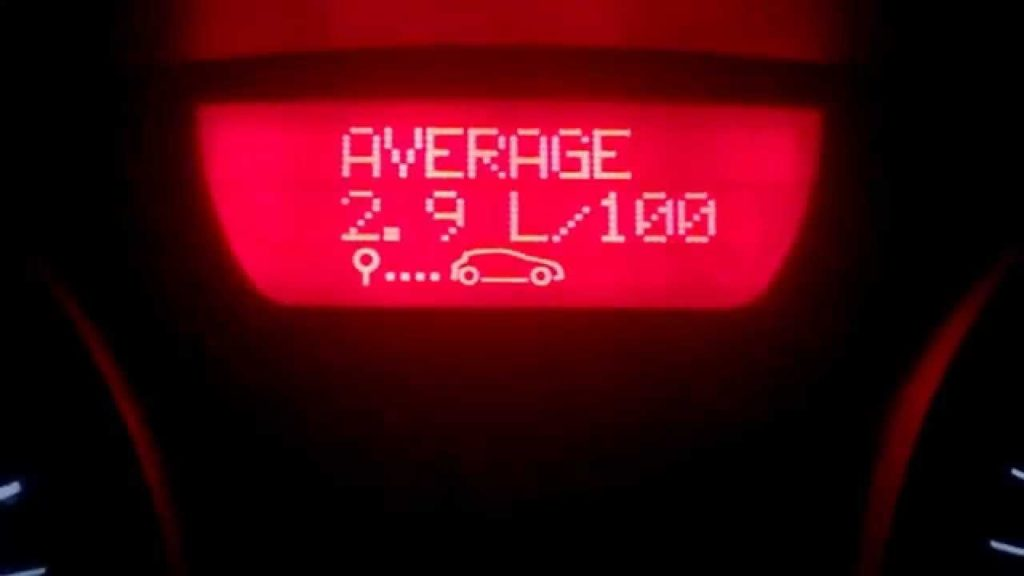

## Linear regression

Let's take a short break from classifying and try to remember what exactly we wanted to acheive with classification. The goal of classification is to find a function which, in an optimal way, divides the data from two or more different sets. Depending on which "side" of the function the data is located, we define a belonging to a certain class. In the case of regression, we also need to find a function or a mathematical form. After, we will use the function to determine which value the function will have for an x from the test dataset which we want to analyze.

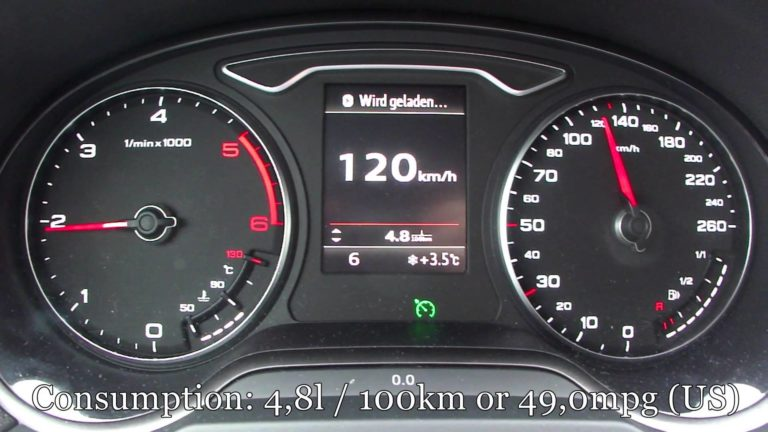

Suppose that we want to find the dependence of spent gasoline (liters/100km) for a new vehicle that was just made. For time and economics of testing, we can't test the vehicle for every speed, but we can test just one finite set of speeds (variable $x$). For each of those speeds $x$ we have to drive the car on a predefined constant speed in the distance of 100km and to read how much gasoline we spent (variable $y$). For our experiment we took speeds in steps of 10km/h (npr. 40, 50, 60, 70 ... 120, 130 [km/h]). The question that regression should answer is what amount of gasoline would be spent for other speeds for which we don't have percise measurements? We need to define a function $f(x)$ on our training set which will for any new values of $x$ (test values) will return a most percise value.

The function $f(x)$ can be defined in many ways. When we classify linearly separable classes, the function could be very simple (for example: a straight line). Also, with regression, we can define a simple linear model if the function $f(x)$ linearly depends on the variable $x$. Mathematically, this can be written down like so:

$f(x)= kx + n$

Since we can never get an equation this percise on realistic data, meaning that for every pair ($x$ and $y$) we get an equivalence, we will add a possibility of a mistake through another variable called $e$:

$y = kx+n+e$

In mathematics, the variable $e$ is taken to represent the element of normal (Gaussian) distribution with a corresponding mean value and standard deviation. The variable $e$ can be thought of as a value that appears due to error in measurement.

The following code illustrates what we talked about:

In [0]:
# Importing standard libraries
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Creating a dataset 
# variable x is generated using uniform distribution [0,1]
# Creating 100 elements from uniform distribution
x = np.random.rand(100)
# If we multiply each of the elements by 10, we will cover an interval [0,10]
x = x * 10 
# Creating a linear function y = k*x + n; for parameters k and n we chose 3 and -4 respectively.
y = 3 * x - 4 

In [0]:
# We will add a vector y Gausian (random) noise so that our example will resemble realistic data
y = y + np.random.randn(100)

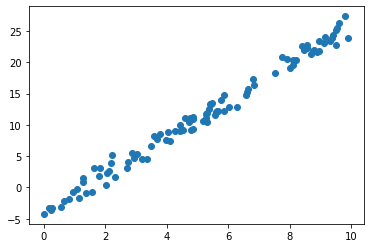

In [5]:
# Let's see what our data set looks like now
plt.scatter(x, y);

Our example clearly illustrates a linear dependency between the variables $x$ and $y$. The task of regression is to determine the coeficients $k$ and $n$ for 100 pairs ($x$ and $y$). In other words, through the "cloud of points" we need to define a function $f(x)$ such that the sum of deviation values $f(x)$ and $y$ on the training set is minimized. We want that for our test set as well of course. Here, we can discuss the difference between $y$ and $f(x)$. Vector $y$ is the measured values that were measured for each value of $x$. Therefore, it's the pairs shown in the graph with points. The function $f(x)$ needs to be determined, and it will model the behaviour process that we're analyzing for any value x (or at least for values that cover the interval of interest, which for us is [0, 10]).

The new block of code displays how to find the parameters k and n. Like with classification, an object of the class (`LinearRegression`) is created, and it will have methods `.fit(x, y)` and `.predict(x_fit)`.


In [0]:
# We import the function for working with linear regression from the sklearn library
from sklearn.linear_model import LinearRegression 

In [0]:
# We create a model which we will use for calculating the parameters of linear regression
model = LinearRegression(fit_intercept=True)

In [8]:
# In a similar way as the LDA algorithm, we use the command fit
model.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We use indexing with the parameters `[:,np.newaxis]`, and we use this to make the initial sequence into a matrix. This isn't too important right now, but you can also run the following commands (`np.ndim(x[:,np.newaxis])=2`, while `np.ndim(x)=1; .ndim()` - dimensions of the ndarray).

In order to use the command `.predict()` it's important to use it on the test elements. One way to do that is the draw the function $f(x)$. Let the interval be [0,10] be divided into steps sized 0.01. For these values ($x\text{_fit}$) we will calculate values $f(x\text{_fit})$ using the command `.predict(x_fit)`.

In [0]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:,np.newaxis])

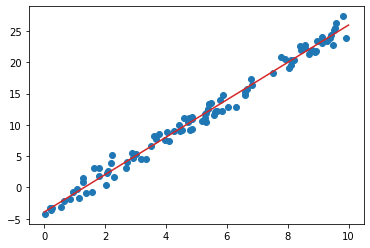

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit, 'C3');

In [12]:
model.coef_[0]

2.987082395374803

In [13]:
model.intercept_

-3.9225497742995366

Finally we get the result from linear regression, represented with the red line. Intuitively it's obvious that this really is the line we wanted to solve our problem. In the Python instance "model", we can find and calculate coeficients $k$ (`model.coef_[0]`) and $n$ (`model.intercept_`). We can see that these values are not too different from our original values.

Let's review what we just did one more time. We made pairs ($x, y$) which we generated using a known linear function. Next, using only the pairs ($x$ and $y$) we managed to determine a new linear function which defines the dependency of $x$ and $y$ using linear regression. In the model itself, regression managed to "learn" these coeficients which we previously used.

Note that if you run the code displayed here, the value for $k$ and $n$ might show a small difference. This is because teh values $x$, and afterwards $y$ as well, are generated as elements of a uniform and normal distribution which will be different every time. 

Try it yourself: in our experiment we used a total of 100 points. Increase this number in the code to examples with 10000, an even more. Observe how the prediction of k and n change. For many statistical models it's shown true that our parameters can be better and more percisely trained with larger datasets.